<a href="https://colab.research.google.com/github/Jaloliddin01/DS-Projects/blob/main/sales_with_advertising_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


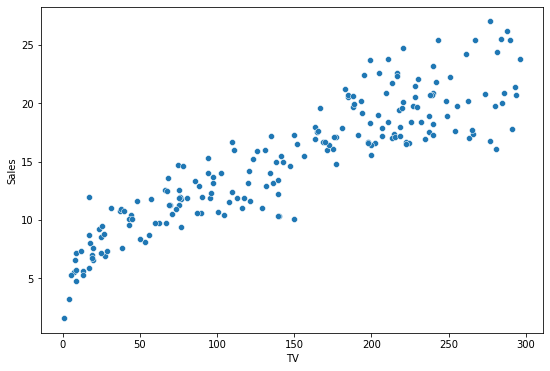

In [4]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='TV', y='Sales')

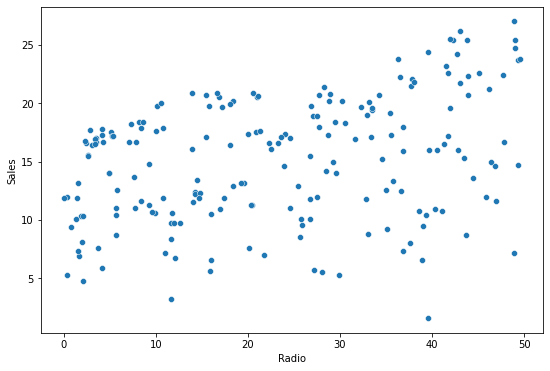

In [5]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')

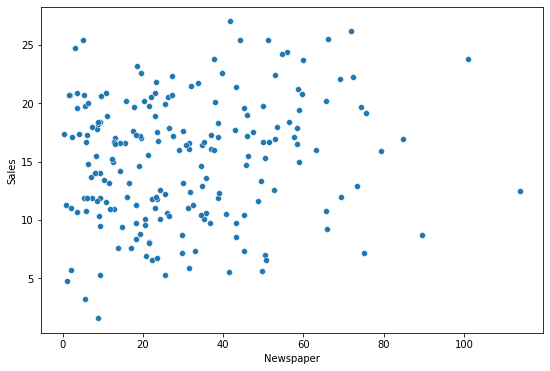

In [6]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales')

Based on graphs above, we can decide that advertising through TV has more coherence than other type of ads. So we will use TV ads data to predict how do ads affect beneficially to Sales.

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])


In [13]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(x_train, y_train)

theta_1 = LR_model.coef_[0][0]
theta_0 = LR_model.intercept_[0]

print(theta_0, theta_1)

7.044916461655207 0.05513263076693964


In [14]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [15]:
predicted_sales = LR_model.predict(x_test)

In [22]:
pd.DataFrame({"Predicted Sales" : predicted_sales.flatten(), "Real Sales" : y_test.flatten()})

,Predicted Sales,Real Sales
0,16.048075,16.9
1,17.817833,22.4
2,23.193264,21.4
3,7.689968,7.3
4,19.190635,24.7
5,11.185377,12.6
6,18.997671,22.3
7,9.801548,8.4
8,19.306414,16.5
9,16.698640,16.1


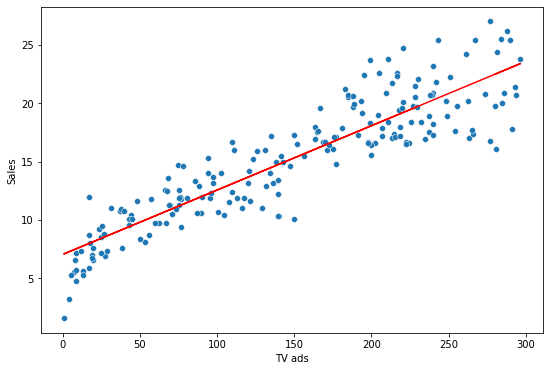

In [25]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta_0 + theta_1*x_train, '-r')
plt.xlabel('TV ads')
plt.ylabel('Sales')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_test, predicted_sales)
MAE = mean_absolute_error(y_test, predicted_sales)

print("MSE : ", MSE)
print("MAE : ", MAE)

MSE :  6.302018984115436
MAE :  2.037955356968121
